# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [215]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [99]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [100]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units ="metric"
response = requests.get(f"{base_url}appid={weather_api_key}&units={units}&q=" + city).json()
pprint (response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 46.1001, 'lon': -77.4995},
 'dt': 1672625433,
 'id': 5937073,
 'main': {'feels_like': -1.79,
          'grnd_level': 997,
          'humidity': 97,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': -1.79,
          'temp_max': -1.79,
          'temp_min': -1.79},
 'name': 'Deep River',
 'sys': {'country': 'CA', 'sunrise': 1672577538, 'sunset': 1672608860},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 163, 'gust': 0.86, 'speed': 0.9}}


In [101]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units ="metric"
# response = requests.get(f"{base_url}appid={weather_api_key}&units={units}&q=" + city).json()
# cities =["london", "oslo"]
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    response = requests.get(f"{base_url}appid={weather_api_key}&units={units}&q=" + city).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = response["weather"]
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response["wind"]['speed']
        city_country = response['sys']['country']
        city_date = response["dt"]

# #         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
       
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | northam
Processing Record 2 of Set 1 | micheweni
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | pavullo nel frignano
Processing Record 6 of Set 1 | karla
Processing Record 7 of Set 1 | auki
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | valparaiso
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | sabratah
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | locri
Processing Record 16 of Set 1 | fayaoue
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | alba

In [102]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [103]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,northam,51.0333,-4.2167,8.12,89,100,4.06,GB,1672625158
1,micheweni,-4.9667,39.8333,26.34,76,8,3.65,TZ,1672625466
2,jamestown,42.0970,-79.2353,5.57,75,100,3.60,US,1672625178
3,anadyr,64.7500,177.4833,-34.73,98,93,3.82,RU,1672625020
4,pavullo nel frignano,44.3315,10.8350,9.32,86,84,1.51,IT,1672625469


In [104]:
# Export the City_Data into a csv
# output_path = os.path.join("..", "output_data", "new.csv")
# print(output_path)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [105]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,northam,51.0333,-4.2167,8.12,89,100,4.06,GB,1672625158
1,micheweni,-4.9667,39.8333,26.34,76,8,3.65,TZ,1672625466
2,jamestown,42.0970,-79.2353,5.57,75,100,3.60,US,1672625178
3,anadyr,64.7500,177.4833,-34.73,98,93,3.82,RU,1672625020
4,pavullo nel frignano,44.3315,10.8350,9.32,86,84,1.51,IT,1672625469


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

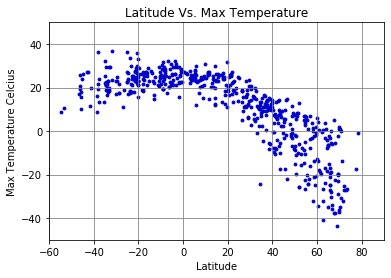

In [208]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Celcius")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
y_lim_ht = (city_data_df["Max Temp"].max()+10).round(-1)
y_lim_lt = (city_data_df["Max Temp"].min()-10).round(-1)
plt.ylim(y_lim_lt,y_lim_ht)
plt.xlim(-60,90)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

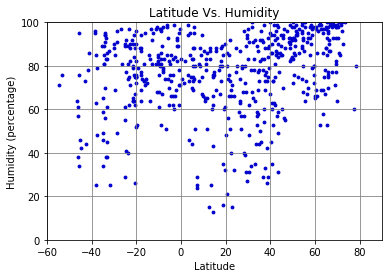

In [209]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o", s=8, color="mediumblue")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (percentage)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.xlim(-60,90)
plt.ylim(0,100)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

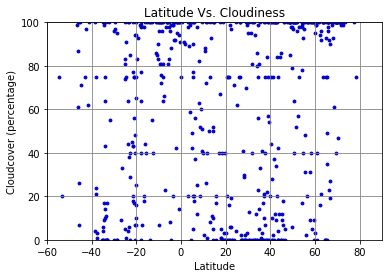

In [210]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o", s=8, color="mediumblue")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudcover (percentage)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.xlim(-60,90)
plt.ylim(0,100)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

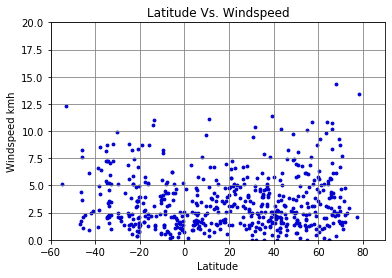

In [211]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o", s=8, color="mediumblue")

# Incorporate the other graph properties
plt.title("Latitude Vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed kmh")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.xlim(-60,90)
y_lim_hw = (city_data_df["Wind Speed"].max()+5).round(-1)
plt.ylim(0,y_lim_hw)
plt.xlim(-60,90)



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [197]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,northam,51.0333,-4.2167,8.12,89,100,4.06,GB,1672625158
2,jamestown,42.0970,-79.2353,5.57,75,100,3.60,US,1672625178
3,anadyr,64.7500,177.4833,-34.73,98,93,3.82,RU,1672625020
4,pavullo nel frignano,44.3315,10.8350,9.32,86,84,1.51,IT,1672625469
5,karla,59.3723,24.9275,1.66,80,0,4.63,EE,1672625470


In [200]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,micheweni,-4.9667,39.8333,26.34,76,8,3.65,TZ,1672625466
6,auki,-8.7676,160.7034,28.21,81,100,4.51,SB,1672625471
7,puerto ayora,-0.7393,-90.3518,22.53,95,14,1.34,EC,1672625473
8,valparaiso,-33.0393,-71.6273,18.80,45,0,1.03,CL,1672625474
12,new norfolk,-42.7826,147.0587,27.17,44,97,0.89,AU,1672624895


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between temperature and lattitude in the Northern Hemisphere is -0.84


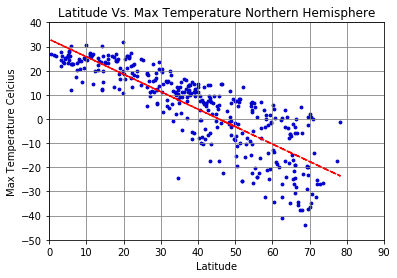

In [250]:
# Linear regression on Northern Hemisphere

nh_mt = northern_hemi_df["Max Temp"]
nh_lat = northern_hemi_df ["Lat"]
print(f"The correlation coefficient between temperature and latitude in the Northern Hemisphere is {round(st.pearsonr(nh_mt,nh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nh_lat, nh_mt)
pe_fit = pe_slope * nh_lat + pe_int

# plt.scatter(nh_mt,nh_lat)
plt.plot(nh_lat,pe_fit,"--", color ="red")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Max Temperature Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Celcius")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
y_lim_htnh = (northern_hemi_df["Max Temp"].max()+10).round(-1)
y_lim_ltnh = (northern_hemi_df["Max Temp"].min()-10).round(-1)
plt.ylim(y_lim_ltnh,y_lim_htnh)
plt.xlim(0,90)


# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The correlation coefficient between temperature and lattitude in the Southern Hemisphere is 0.37


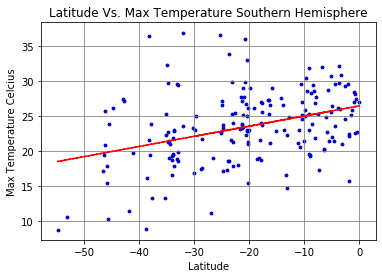

In [246]:
# Linear regression on Southern Hemisphere
sh_mt = southern_hemi_df["Max Temp"]
sh_lat = southern_hemi_df ["Lat"]
print(f"The correlation coefficient between temperature and latitude in the Southern Hemisphere is {round(st.pearsonr(sh_mt,sh_lat)[0],2)}")


pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(sh_lat, sh_mt)
pe_fit = pe_slope * sh_lat + pe_int
plt.plot(sh_lat,pe_fit,"--", color ="red")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Max Temperature Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Celcius")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
y_lim_htsh = (southern_hemi_df["Max Temp"].max()+10).round(-1)
y_lim_ltsh = (southern_hemi_df["Max Temp"].min()-10).round(-1)
# plt.ylim(y_lim_ltsh,y_lim_htsh)
# plt.xlim(-60,0)


# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:**
There is a much stronger positive correlation between temperature and latitude in the Northern Hemisphere. This could possibly be due to the opposites in season. Further analysis will be needed to determine if the linear relationship changes over the seasons in both hemisheres.

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient between humidity and lattitude in the Northern Hemisphere is 0.36
0.04731006677096508


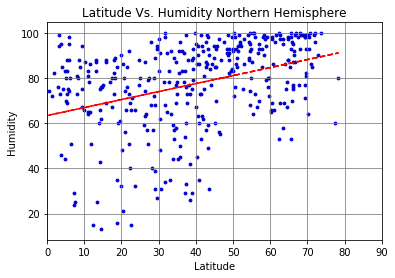

In [255]:
# Northern Hemisphere
nh_hu = northern_hemi_df["Humidity"]
nh_lat = northern_hemi_df ["Lat"]
print(f"The correlation coefficient between humidity and latitude in the Northern Hemisphere is {round(st.pearsonr(nh_hu,nh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nh_lat, nh_hu)
pe_fit = pe_slope * nh_lat + pe_int

plt.plot(nh_lat,pe_fit,"--", color ="red")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Humidity Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(0,90)


# Save the figure
plt.savefig("output_data/Fig7.png")
# Show plot
plt.show()

The correlation coefficient between humidity and lattitude in the Southern Hemisphere is 0.28


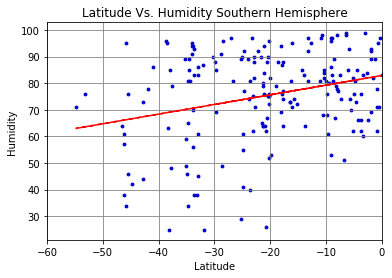

In [263]:
# Southern Hemisphere
sh_hu = southern_hemi_df["Humidity"]
sh_lat = southern_hemi_df ["Lat"]
print(f"The correlation coefficient between humidity and latitude in the Southern Hemisphere is {round(st.pearsonr(sh_hu,sh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(sh_lat, sh_hu)
pe_fit = pe_slope * sh_lat + pe_int

plt.plot(sh_lat,pe_fit,"--", color ="red")
plt.scatter(sh_lat,sh_hu,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Humidity Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(-60,0)

# Save the figure
plt.savefig("output_data/Fig8.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and humidity in both Hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient between cloudiness and lattitude in the Northern Hemisphere is 0.27


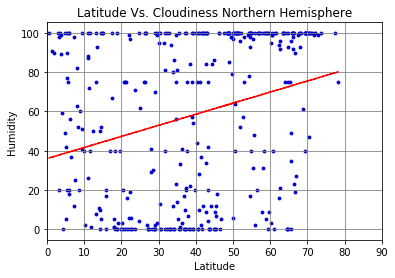

In [267]:
# Northern Hemisphere
nh_cl = northern_hemi_df["Cloudiness"]
nh_lat = northern_hemi_df ["Lat"]
print(f"The correlation coefficient between cloudiness and latitude in the Northern Hemisphere is {round(st.pearsonr(nh_cl,nh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nh_lat, nh_cl)
pe_fit = pe_slope * nh_lat + pe_int

plt.plot(nh_lat,pe_fit,"--", color ="red")
plt.scatter(nh_lat,nh_cl,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Cloudiness Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(0,90)


# Save the figure
plt.savefig("output_data/Fig9.png")
# Show plot
plt.show()

The correlation coefficient between cloudiness and lattitude in the Southern Hemisphere is 0.35


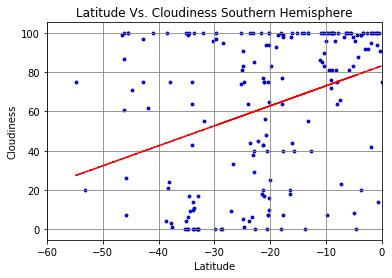

In [272]:
# Southern Hemisphere
sh_cl = southern_hemi_df["Cloudiness"]
sh_lat = southern_hemi_df ["Lat"]
print(f"The correlation coefficient between cloudiness and latitude in the Southern Hemisphere is {round(st.pearsonr(sh_cl,sh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(sh_lat, sh_cl)
pe_fit = pe_slope * sh_lat + pe_int

plt.plot(sh_lat,pe_fit,"--", color ="red")
plt.scatter(sh_lat,sh_cl,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Cloudiness Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(-60,0)

# Save the figure
plt.savefig("output_data/Fig10.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and cloudiness, 
with a slightly higher correlation in the Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient between Wind Speed and lattitude in the Northern Hemisphere is 0.13


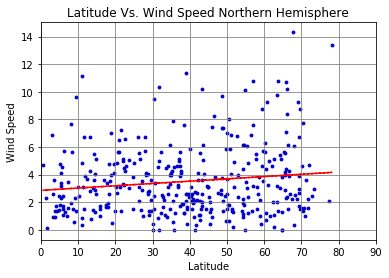

In [269]:
# Northern Hemisphere
nh_ws = northern_hemi_df["Wind Speed"]
nh_lat = northern_hemi_df ["Lat"]
print(f"The correlation coefficient between Wind Speed and latitude in the Northern Hemisphere is {round(st.pearsonr(nh_ws,nh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nh_lat, nh_ws)
pe_fit = pe_slope * nh_lat + pe_int

plt.plot(nh_lat,pe_fit,"--", color ="red")
plt.scatter(nh_lat,nh_ws,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Wind Speed Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(0,90)


# Save the figure
plt.savefig("output_data/Fig11.png")
# Show plot
plt.show()

The correlation coefficient between Wind Speed and lattitude in the Southern Hemisphere is -0.29


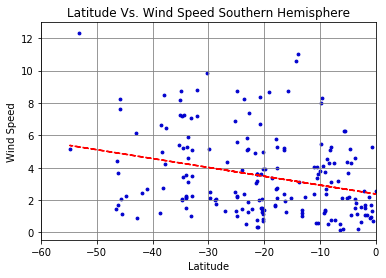

In [271]:
# Southern Hemisphere
sh_ws = southern_hemi_df["Wind Speed"]
sh_lat = southern_hemi_df ["Lat"]
print(f"The correlation coefficient between Wind Speed and latitude ude in the Southern Hemisphere is {round(st.pearsonr(sh_ws,sh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(sh_lat, sh_ws)
pe_fit = pe_slope * sh_lat + pe_int

plt.plot(sh_lat,pe_fit,"--", color ="red")
plt.scatter(sh_lat,sh_ws,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Wind Speed Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(-60,0)

# Save the figure
plt.savefig("output_data/Fig12.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity, 
slightly positive for the Northern Hemisphere and slightly negative for the Southern Hemisphere.